## XGBoost

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('Datasets/Fictionaldata.zip')

In [3]:
df.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [4]:
X = df.drop(['BattleOutcome'], axis=1)

In [5]:
X.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite
4,Flash,Marvel,7,6,2,Invisibility,Magic


In [6]:
Y = df['BattleOutcome']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: BattleOutcome, dtype: int64

In [7]:
df['Character'].unique()

array(['Wonder Woman', 'Iron Man', 'Spider-Man', 'Flash', 'Thor',
       'Batman', 'Superman', 'Captain America'], dtype=object)

In [8]:
X['Character'].replace(' ','_',regex=True,inplace=True)
X['Character'].head()

0    Wonder_Woman
1        Iron_Man
2        Iron_Man
3      Spider-Man
4           Flash
Name: Character, dtype: object

In [9]:
X_encoded = pd.get_dummies(X,columns=['Character',	'Universe', 'SpecialAbilities', 'Weaknesses'])
X_encoded.head()

,Strength,Speed,Intelligence,Character_Batman,Character_Captain_America,Character_Flash,Character_Iron_Man,Character_Spider-Man,Character_Superman,Character_Thor,...,Universe_DC Comics,Universe_Marvel,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake
0,7,8,3,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,4,7,9,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,8,7,5,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,5,6,10,0,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
4,7,6,2,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded,Y,test_size=0.2,random_state=42,stratify=Y)

In [11]:
import xgboost as xgb

In [12]:
train = xgb.DMatrix(X_train , label=Y_train)
test = xgb.DMatrix(X_test , label=Y_test)

In [93]:
param = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'num_class': 1} 
epochs = 30

In [94]:
model = xgb.train(param, train, epochs)

In [95]:
predictions = model.predict(test)
predictions = [1 if x > 0.5 else 0 for x in predictions]

In [96]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, predictions)

0.8110403397027601

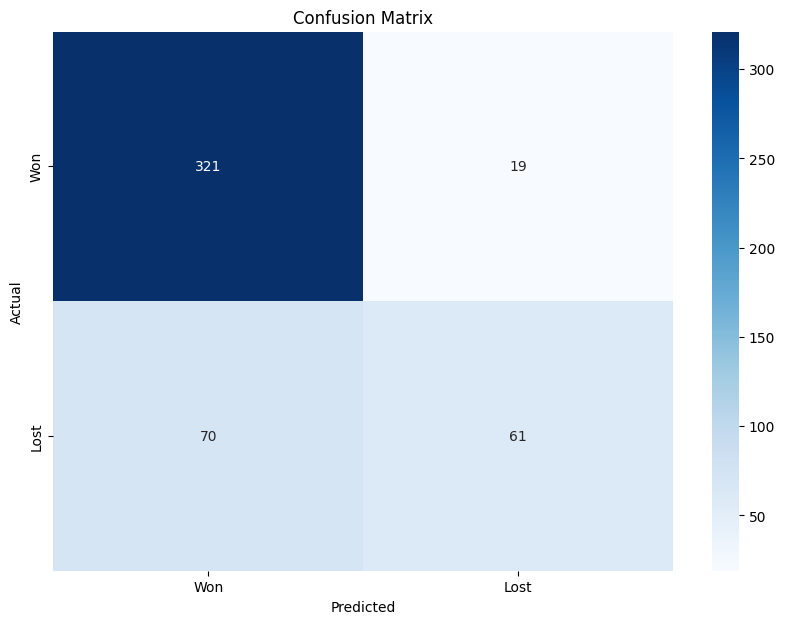

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Won','Lost'], yticklabels=['Won','Lost'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Neural Networks

In [58]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [59]:
model = Sequential([
    Dense(units=32,activation='relu',input_dim=len(X_train.columns)),
    Dense(units=64,activation='relu'),
    Dense(units=1,activation='sigmoid')
])

C:\Users\Ishan Pardeshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(X_train,Y_train,epochs=10,batch_size=40);

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.8438 - loss: 0.3150
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.8426 - loss: 0.3218
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8365 - loss: 0.3195
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8512 - loss: 0.3248
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.8495 - loss: 0.3122
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8474 - loss: 0.3160
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.8454 - loss: 0.3142
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8504 - loss: 0.3103
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8361 - loss: 0.3176
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.8455 - loss: 0.3206


In [66]:
y_hat=model.predict(X_test)
y_hat=[0 if val <0.5 else 1 for val in y_hat]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step


In [67]:
accuracy_score(Y_test,y_hat)

0.7834394904458599

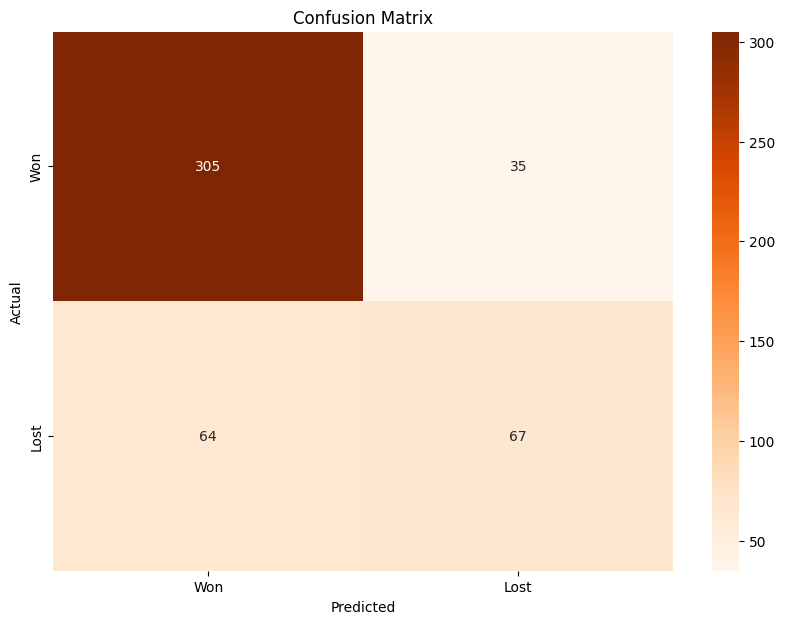

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_hat)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['Won','Lost'], yticklabels=['Won','Lost'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()